<a href="https://colab.research.google.com/github/chandra17iith/My_ML/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Email Detection

This project implements a machine learning pipeline to classify emails as spam or not spam using natural language processing and various classification algorithms. The dataset is preprocessed to clean text data, vectorized, and then used to train multiple models to determine the most effective classifier.

## Features
- Data cleaning (removing punctuation, stop words, stemming).
- Splitting the data into training and test sets.
- Testing multiple machine learning classifiers:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - Support Vector Classifier
  - K-Nearest Neighbors
  - Naive Bayes
- Performance evaluation using metrics like accuracy, confusion matrix, and classification report.

## Dataset
The project uses the [Spam Mails Dataset](https://www.kaggle.com/venky73/spam-mails-dataset), which contains labeled email messages with labels `0` (not spam) and `1` (spam).

## Installation

1. Clone the repository or download the script file:
   ```bash
   git clone <repository_url>
   ```
2. Install the required libraries:
   ```bash
   pip install numpy pandas matplotlib seaborn scikit-learn xgboost nltk
   ```

3. Download the dataset and place it in the appropriate directory as specified in the script.

## Usage

1. Run the script to preprocess the data and train the models:
   ```bash
   python spam_email_detection.py
   ```
2. Review the outputs to determine the performance of various classifiers. The best-performing model can be selected for further use or deployment.

## Results

- Random Forest achieved the highest accuracy of **97.64%** on the test dataset.
- Confusion matrices and classification reports for all models are displayed in the output.

## Future Improvements

- Fine-tuning hyperparameters to improve model accuracy.
- Testing additional text vectorization techniques like TF-IDF.
- Integrating the model into a real-time spam detection application.

## Dependencies

- Python 3.7+
- Libraries:
  - numpy
  - pandas
  - matplotlib
  - seaborn
  - scikit-learn
  - xgboost
  - nltk

## License
This project is licensed under the MIT License - see the [LICENSE](LICENSE) file for details.

## Acknowledgments
- Dataset provided by [Kaggle](https://www.kaggle.com/venky73/spam-mails-dataset).
- Special thanks to open-source contributors for their tools and libraries.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
venky73_spam_mails_dataset_path = kagglehub.dataset_download('venky73/spam-mails-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [ ]:
dataset = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')

In [ ]:
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# Data  Preprocessing

In [ ]:
dataset.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

* so we have no null and duplicate value
* we only need text and label num for our purpose

In [ ]:
df = dataset[['text','label_num']]
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
length = len(df['text'])

## Cleaning text

* We will remove punctuation and other unnecessary item from our text
* Then will be stemming the word to its root form

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus=[]
# contain list of words that will be used for training -> final words after cleaning

for i in range(0,length):
  # re is used to remove punctuations
  text = re.sub('[^a-zA-Z]',' ',df['text'][i]) # replaces the punctuation with space

  # converting to lowercase
  text=text.lower()

  # stemming
  text=text.split()
  ps = PorterStemmer()
  all_stopwords=stopwords.words('english')
  text = [ps.stem(word) for word  in text if not word in set(all_stopwords)]
  text = ' '.join(text)

  corpus.append(text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[0:5]

['subject enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari see attach file hplnol xl hplnol xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb januari like think minut calend hand begin fall semest retreat schedul weekend januari youth minist confer brad dustin connect week go chang date follow weekend januari come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place bedroom bedroom hous side side countri real relax also close brenha

In [ ]:
df = df.copy()

In [ ]:
df['cleanText'] = corpus

In [ ]:
df

,text,label_num,cleanText
0,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter follow note gave ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom januari see attach file hplnol...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal book teco pvr reven...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,subject put ft transport volum decreas contrac...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject follow nom hpl take extra mmcf weekend...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpin daili ga nomin juli mention ear...
5169,Subject: industrial worksheets for august 2000...,0,subject industri worksheet august activ attach...


In [ ]:
df['cleanText']=df['cleanText'].str.replace('subject', '')

In [ ]:
df

,text,label_num,cleanText
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday ...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpl...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas ...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu under...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volum decreas contract thank...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom hpl take extra mmcf weekend tri ne...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli mention earlier ho...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet august activ attach worksh...


# splitting data into training set and test set

In [ ]:
x=df.loc[:,'cleanText'].values
y=df.loc[:,'label_num'].values

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Classifiying using various classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import xgboost as xg
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
def train_test_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f'accuracy score of {model} is :{score}')
    print(f'{classification_report(y_test,y_pred)}')
    mx=confusion_matrix(y_test,y_pred)
    sns.heatmap(mx,annot=True, fmt='d', cmap='Blues', xticklabels=['Not spam', 'spam'], yticklabels=['Not spam', 'spam'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


accuracy score of LogisticRegression() is :0.9797101449275363
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.96      0.97      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



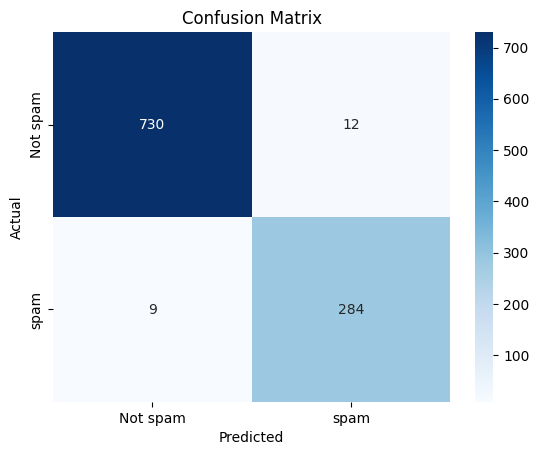

In [ ]:
train_test_model(LogisticRegression())

accuracy score of DecisionTreeClassifier(max_depth=20) is :0.9227053140096618
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       742
           1       0.82      0.92      0.87       293

    accuracy                           0.92      1035
   macro avg       0.90      0.92      0.91      1035
weighted avg       0.93      0.92      0.92      1035



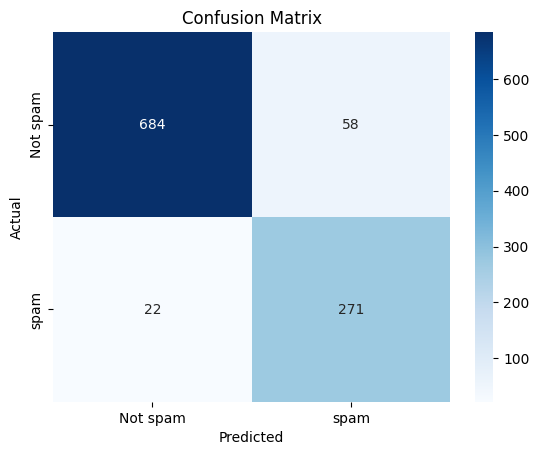

In [ ]:
train_test_model(DecisionTreeClassifier(max_depth=20))

accuracy score of RandomForestClassifier() is :0.9768115942028985
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.96      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



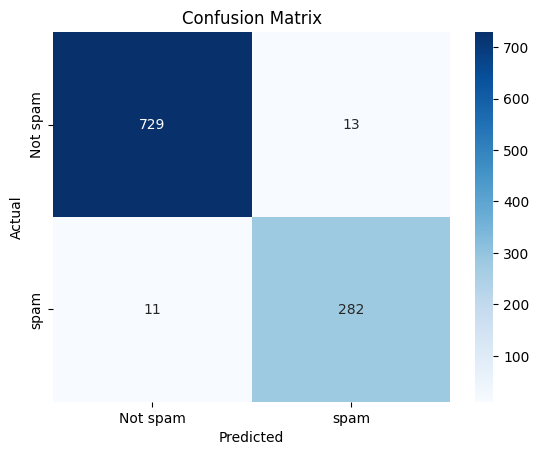

In [ ]:
train_test_model(RandomForestClassifier())

accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is :0.970048309178744
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       742
           1       0.93      0.97      0.95       293

    accuracy                           0.97

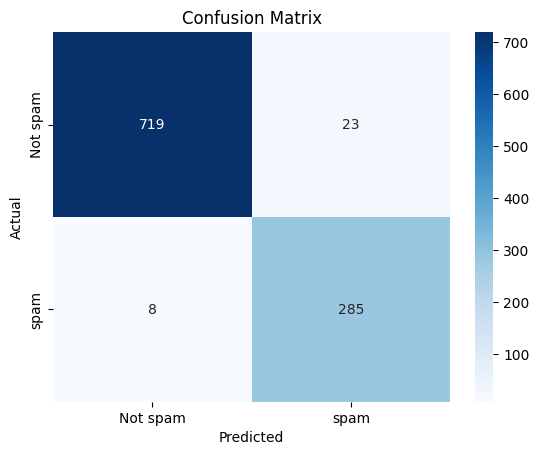

In [ ]:
train_test_model(xg.XGBClassifier(learning_rate= 0.2, max_depth=7, n_estimators= 100))

accuracy score of SVC() is :0.9594202898550724
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       742
           1       0.90      0.97      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



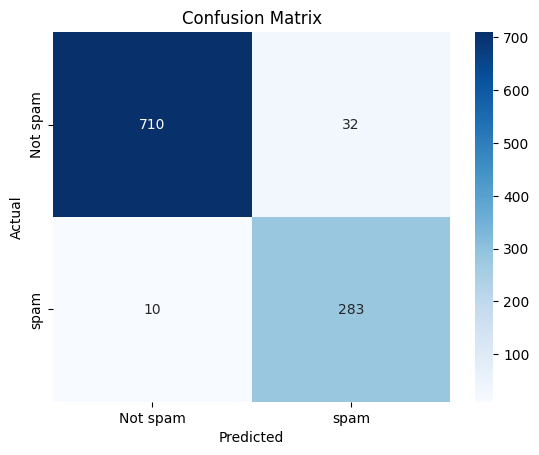

In [ ]:
train_test_model(SVC())

accuracy score of KNeighborsClassifier() is :0.8367149758454107
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       742
           1       0.64      0.97      0.77       293

    accuracy                           0.84      1035
   macro avg       0.81      0.88      0.82      1035
weighted avg       0.89      0.84      0.84      1035



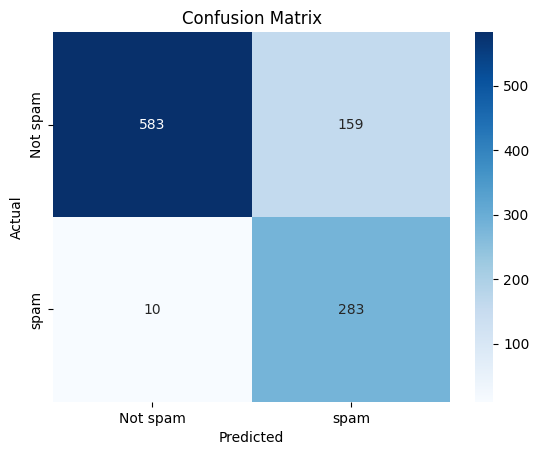

In [ ]:
train_test_model(KNeighborsClassifier())

accuracy score of GaussianNB() is :0.9526570048309179
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       742
           1       0.95      0.88      0.91       293

    accuracy                           0.95      1035
   macro avg       0.95      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035



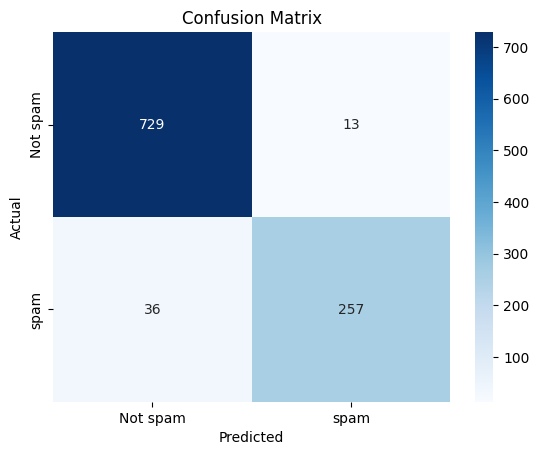

In [ ]:
train_test_model(GaussianNB())

#

# Result and inference

In [ ]:
df['label_num'].value_counts()/df['label_num'].count().sum()

label_num
0    0.710114
1    0.289886
Name: count, dtype: float64

so we could see that our model has done better as it is better to use the model than saying that mail is not spam

we could see that `random forest` has better accuracy i.e of `97.64`%
* Improvements can be done by tuning the hyperparameters